# Problem Statement:

\begin{equation} H_{0} : p_{gate30} - p_{gate40} >= 0 \end{equation}

\begin{equation} H_{1} : p_{gate30} - p_{gate40} < 0 \end{equation}

## Read & Understand the data

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('cookie_cats.csv')

df.head()

,userid,version,sum_gamerounds,retention_1,retention_7
0,116,gate_30,3,False,False
1,337,gate_30,38,True,False
2,377,gate_40,165,True,False
3,483,gate_40,1,False,False
4,488,gate_40,179,True,True


### How many player in each group?

##### Hint: Use groupby with count

In [2]:
df.groupby('version').count()

,userid,sum_gamerounds,retention_1,retention_7
version,,,,
gate_30,44700,44700,44700,44700
gate_40,45489,45489,45489,45489


### What is the percentage of users that came back the day after they installed?

In [3]:
df['retention_1'].mean()

0.4452095044850259

### What is the percentage of users of each group [gate_30, gate_40] that came back the day after they installed?


In [4]:
statistic = df.groupby('version').retention_1.mean()[0] - df.groupby('version').retention_1.mean()[1]
df.groupby('version').retention_1.mean()

version
gate_30    0.448188
gate_40    0.442283
Name: retention_1, dtype: float64

### Bootstrap the data by resampling the dataset with replacement for retention_1

##### Hint:  use .sample method with frac = 1 and replace = True
##### Hint:  groupby the result of sampling by version column then select retention_1 column and apply mean as an agg function
##### Hint: take difference in mean between the 2 groups in each iteration and append it to a list

version,gate_30,gate_40
retention_1,0.446908,0.442630
retention_1,0.448482,0.439765
retention_1,0.450436,0.441099
retention_1,0.450283,0.442487
retention_1,0.450122,0.435559


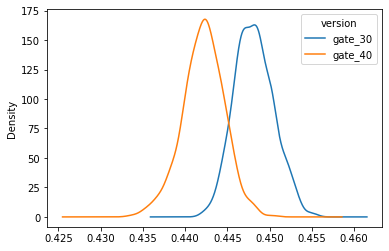

In [5]:
boot_1d = []
boot_diff = []
for i in range(500):
    boot_mean = df.sample(frac=1, replace = True).groupby('version').retention_1.mean()
    boot_diff.append(boot_mean[0] - boot_mean[1])
    boot_1d.append(boot_mean)
    
boot_1d = pd.DataFrame(boot_1d)
boot_1d.plot.kde()
    
boot_1d.head()

### Plot the difference distribution 

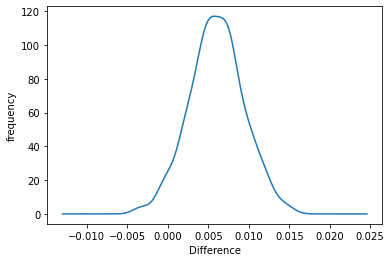

In [6]:
boot_1d['diff'] = (boot_1d['gate_30']-boot_1d['gate_40'])

boot_1d['diff'].plot.kde()
plt.xlabel('Difference')
plt.ylabel('frequency');

### At alpha level 0.05, should we reject the null ?
##### Hint: Calculate the P-Value

# Calculate STDerr

In [7]:
boot_1d['diff'].std()

0.003334900290481021

# Simulate under the null

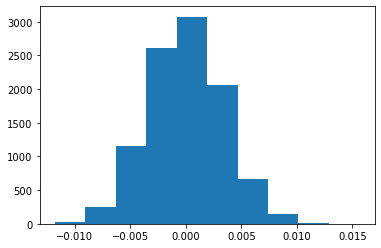

In [8]:
import numpy as np
simulate_under_null = np.random.normal(0, boot_1d['diff'].std(), 10000)
plt.hist(simulate_under_null);

# Calculate P-Value

In [9]:
(simulate_under_null < statistic).mean()

0.9589